In [1]:
import sys
import os
import math
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

** Opening each folder and finding files **

In [2]:
start_path = 'C:\\Users\\Devin\\cfb'

In [3]:
#year folders
years = ['2008_Season','2009_Season','2010_Season','2011_Season',
         '2012_Season','2013_Season','2014_Season','2015_Season']

In [4]:
# FBS teams each season
teams = {}
for year in years:
    cur_dir = os.chdir(start_path+'\\'+year)
    teams[year] = os.listdir()

In [5]:
teams

{'2008_Season': ['Air Force',
  'Akron',
  'Alabama',
  'Arizona',
  'Arizona State',
  'Arkansas',
  'Arkansas State',
  'Army',
  'Auburn',
  'Ball State',
  'Baylor',
  'Boise State',
  'Boston College',
  'Bowling Green',
  'Buffalo',
  'BYU',
  'California',
  'Central Michigan',
  'Cincinnati',
  'Clemson',
  'Colorado',
  'Colorado State',
  'Connecticut',
  'Duke',
  'East Carolina',
  'Eastern Michigan',
  'Florida',
  'Florida Atlantic',
  'Florida International',
  'Florida State',
  'Fresno State',
  'Georgia',
  'Georgia Tech',
  "Hawai'i",
  'Houston',
  'Idaho',
  'Illinois',
  'Indiana',
  'Iowa',
  'Iowa State',
  'Kansas',
  'Kansas State',
  'Kent State',
  'Kentucky',
  'Louisiana Tech',
  'Louisiana-Lafayette',
  'Louisiana-Monroe',
  'Louisville',
  'LSU',
  'Marshall',
  'Maryland',
  'Memphis',
  'Miami (Florida)',
  'Miami (Ohio)',
  'Michigan',
  'Michigan State',
  'Middle Tennessee',
  'Minnesota',
  'Mississippi',
  'Mississippi State',
  'Missouri',
  'Nav

In [6]:
file_names = ['Team Score.html','Team First Downs.html', 'Team Penalty Yards.html', 'Team Total Yards.html', 
              'Turnover Margin.html']


In [7]:
df_heads = ['Date Team Score','Surface Team Score','Result Team Score','Pass Team First Downs', 'TD Team Score', 
            'Total Gain Turnover Margin', 'FG Team Score', 'Pen./G Team Penalty Yards', 'Rush Yards Team Total Yards', 
            'Points Team Score', 'Safety Team Score', 'Pass Yards Team Total Yards', 'Rush Team First Downs', 
            'Pen. Team Penalty Yards', 'Fum. Gain Turnover Margin', 'Yards Team Penalty Yards', 'Total Lost Turnover Margin', 
            'Margin Turnover Margin', 'Total Team First Downs', '1XP Team Score', 'Total Yards Team Total Yards', 
            'Int. Lost Turnover Margin', 'Plays Team Total Yards', 'Int. Gain Turnover Margin', 'Fum. Lost Turnover Margin', 
            '2XP Team Score', 'Yards/Play Team Total Yards', 'Yards/G Team Penalty Yards', 'Penalty Team First Downs']

** Scrape Files **

In [9]:
cfb = pd.DataFrame()
games = []
game_dict = {}
os.chdir(start_path)
for year in ['2008_Season']:
    for team in teams[year]:
        cur_dir = os.chdir(start_path+'\\'+year+'\\'+team)
        for file in file_names:
            c = open(file)
            fb = BeautifulSoup(c,'html.parser')
            head = []
            for a in fb.findAll('th'):
                head.append(a.string+' '+file.split('.')[0])
            rows = fb.findAll('tr')
            games = []
            for row in rows:
                cols = row.findAll('td')
                game = []
                for td in cols:
                    if td.string == None:
                        try:
                            game.append(td.find('a').string)
                        except AttributeError:
                            continue
                    else:
                        game.append(td.string)
                if game == []:
                    continue
                elif game[0][1] in '0123456789':
                    games.append(game)
                else:
                    continue
            stats = np.array(games)
            for i in range(len(head)):
                try:
                    game_dict[head[i]].extend(list(stats[:,i]))
                except KeyError:
                    game_dict[head[i]] = list(stats[:,i])

                
               

In [10]:
cfb = pd.DataFrame(game_dict)

In [11]:
print(list(key for key in game_dict.keys() if key.split()[0]!='Date' and key.split()[0]!='Surface' and key.split()[0]!='Result'
           and key.split()[0]!='Opponent'))

['Yards Team Penalty Yards', 'Rush Team First Downs', 'Yards/G Team Penalty Yards', 'Total Gain Turnover Margin', 'Fum. Lost Turnover Margin', 'Pen./G Team Penalty Yards', '1XP Team Score', 'Rush Yards Team Total Yards', 'Int. Gain Turnover Margin', 'Int. Lost Turnover Margin', 'Plays Team Total Yards', 'Safety Team Score', 'TD Team Score', 'Total Team First Downs', 'Points Team Score', 'Penalty Team First Downs', 'Pass Yards Team Total Yards', 'FG Team Score', 'Pass Team First Downs', 'Total Yards Team Total Yards', 'Yards/Play Team Total Yards', 'Total Lost Turnover Margin', 'Margin Turnover Margin', '2XP Team Score', 'Pen. Team Penalty Yards', 'Fum. Gain Turnover Margin']


In [12]:
cfb = cfb[df_heads]

In [13]:
for x in cfb:
    try:
        if '/' in x:
            cfb[x] = cfb[x].apply(float)
        else:
            cfb[x] = cfb[x].apply(int)
    except ValueError:
        continue


In [14]:
cfb['Points For'] = cfb['Result Team Score'].str.split().str[1].str.split('-').str[0].apply(int)

In [15]:
cfb['Points Against'] = cfb['Result Team Score'].str.split().str[1].str.split('-').str[1].apply(int)

In [16]:
cfb['Point Differential'] = cfb['Points For'] - cfb['Points Against']

In [17]:
cfb.head()

,Date Team Score,Surface Team Score,Result Team Score,Pass Team First Downs,TD Team Score,Total Gain Turnover Margin,FG Team Score,Pen./G Team Penalty Yards,Rush Yards Team Total Yards,Points Team Score,...,Plays Team Total Yards,Int. Gain Turnover Margin,Fum. Lost Turnover Margin,2XP Team Score,Yards/Play Team Total Yards,Yards/G Team Penalty Yards,Penalty Team First Downs,Points For,Points Against,Point Differential
0,08/30/08,Turf,W 41-7,3,4,2,3,6.0,433,41,...,88,0,2,0,5.77,50.0,4,41,7,34
1,09/06/08,Turf,W 23-3,0,2,5,3,7.0,261,23,...,67,1,0,0,4.12,42.0,1,23,3,20
2,09/13/08,Turf,W 31-28,0,4,2,1,10.0,380,31,...,78,1,0,0,4.87,73.0,3,31,28,3
3,09/20/08,Turf,L 23-30,4,3,3,1,3.0,53,23,...,55,1,0,0,3.47,25.0,1,23,30,-7
4,10/04/08,Turf,L 27-33,7,3,2,2,10.0,227,27,...,77,0,2,0,5.34,75.0,0,27,33,-6


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
non_scoring = [x for x in cfb.columns if 'Score' not in x]

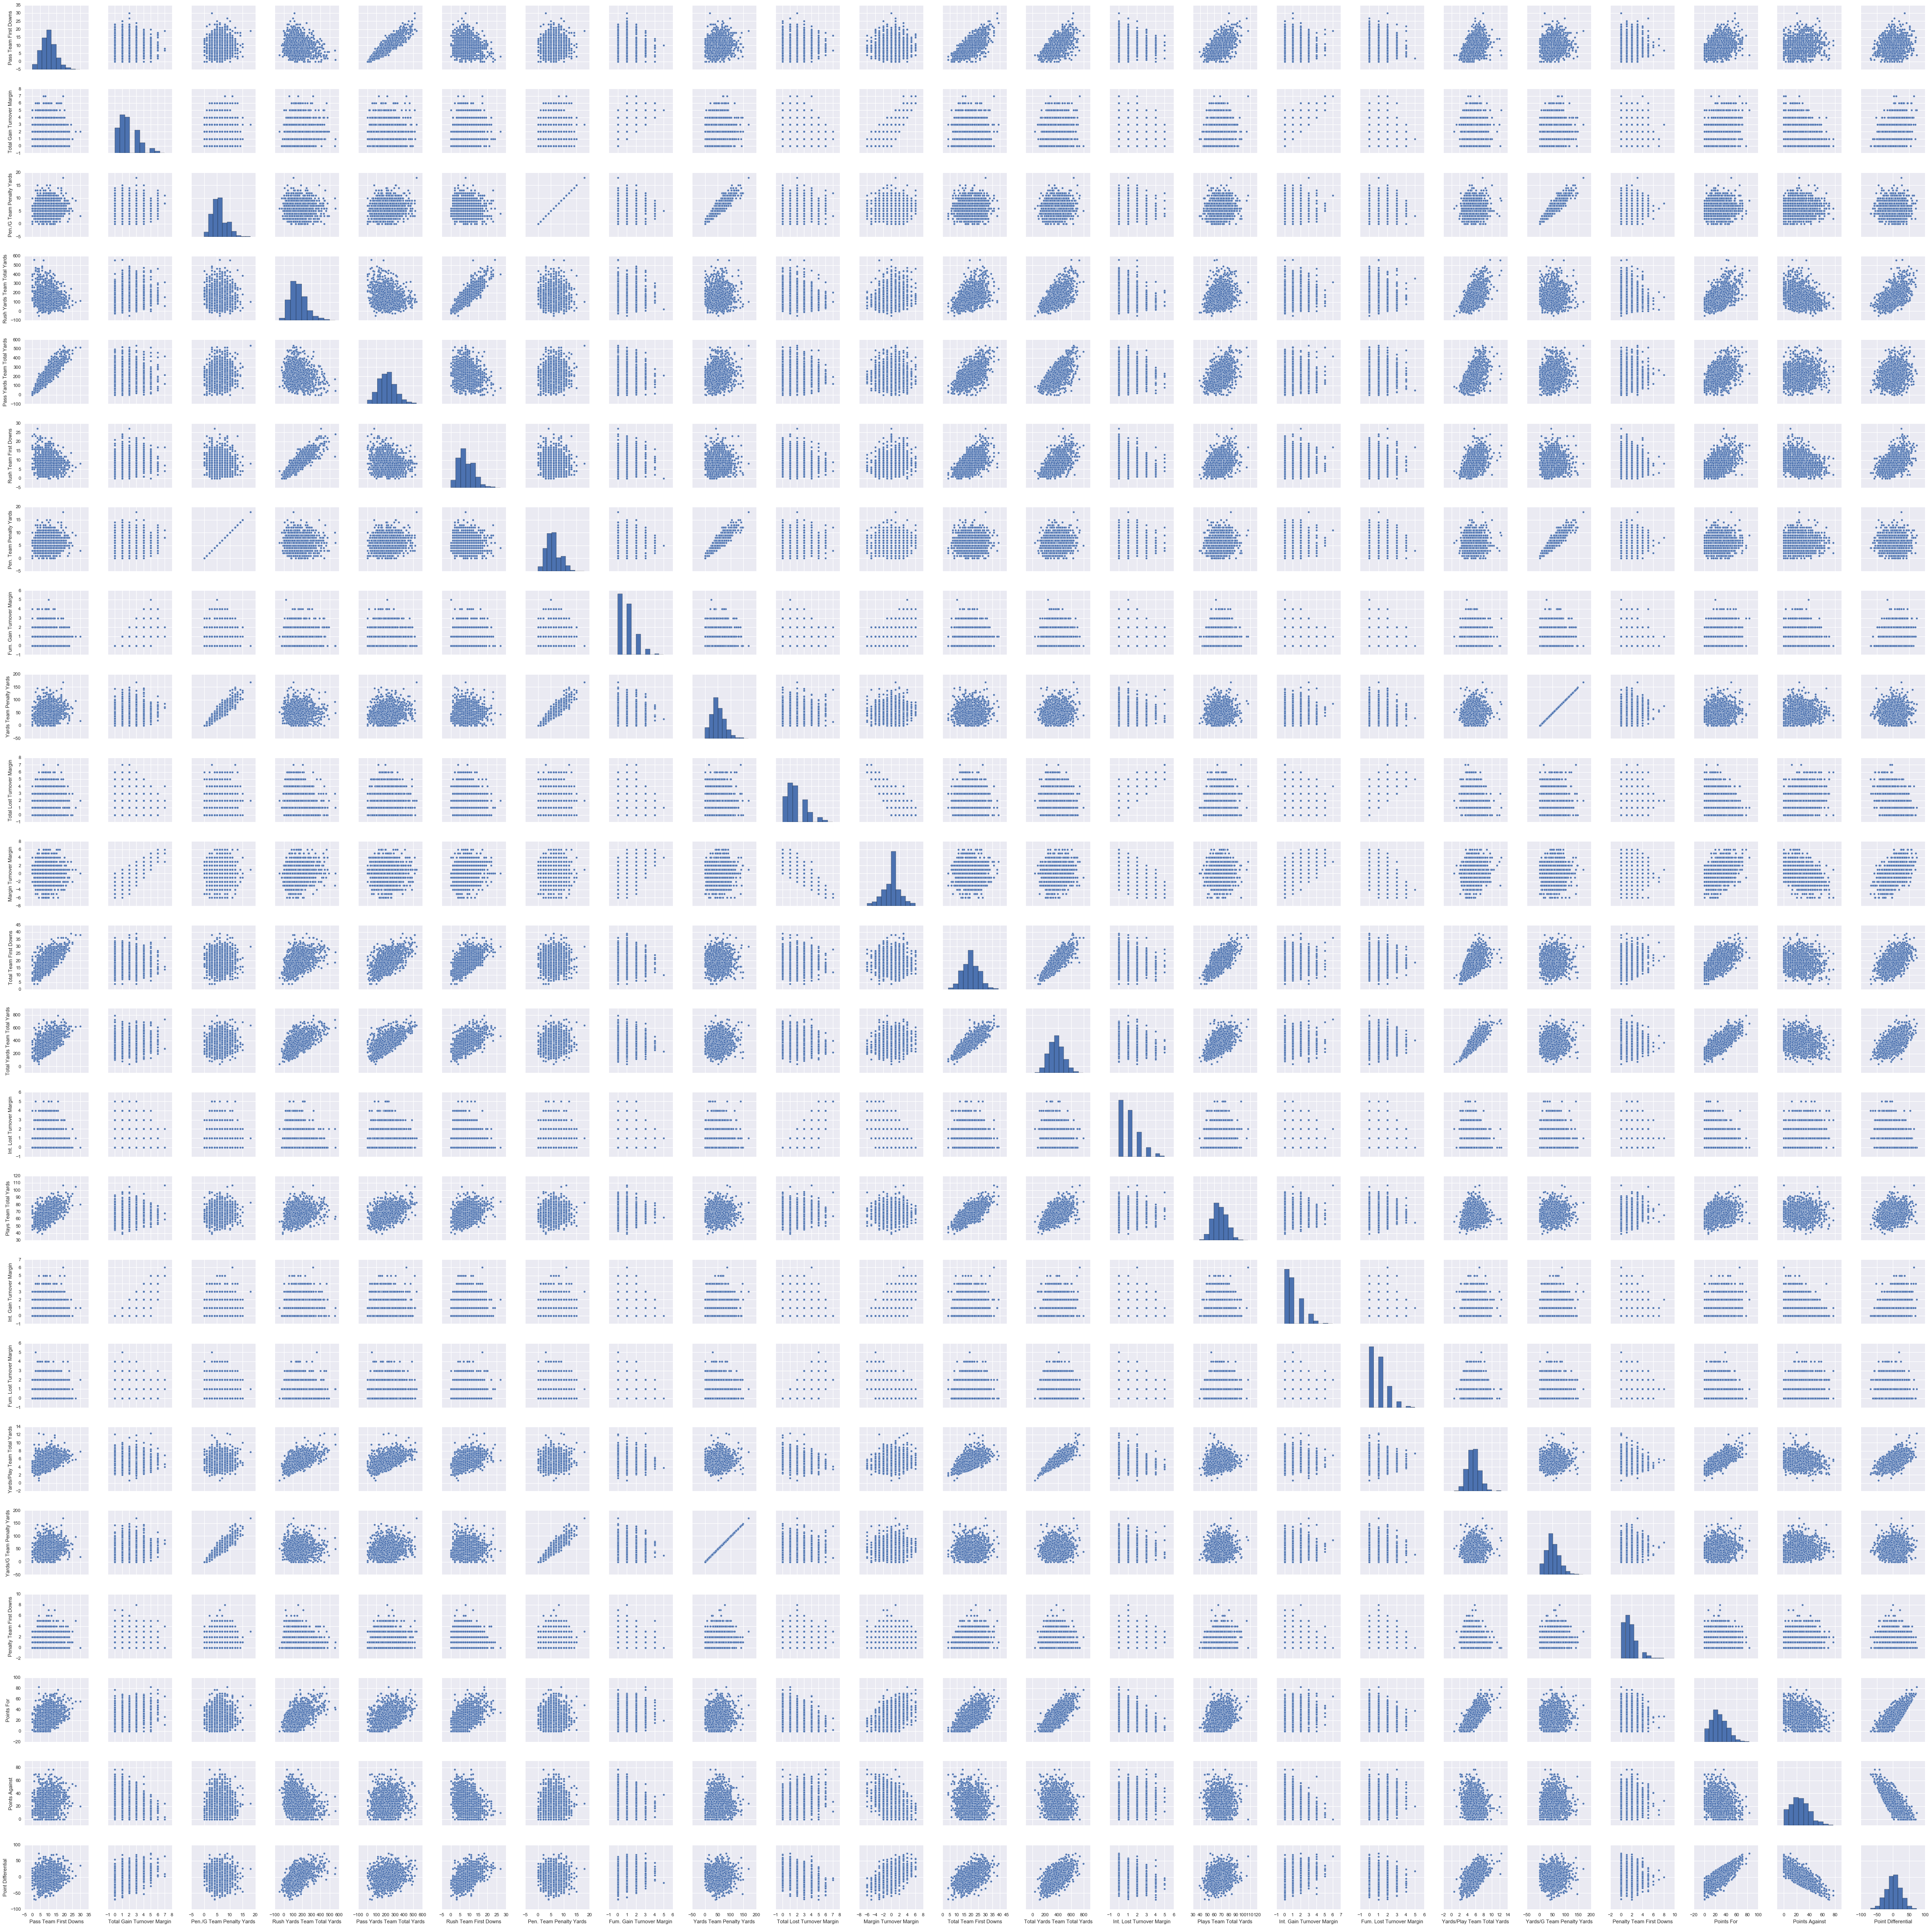

In [20]:
sns.pairplot(cfb[non_scoring])

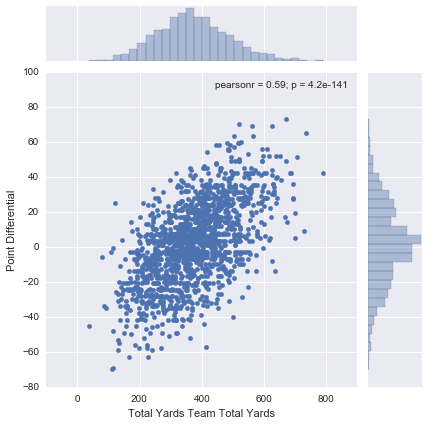

In [21]:
sns.jointplot(x='Total Yards Team Total Yards',y='Point Differential', data = cfb)

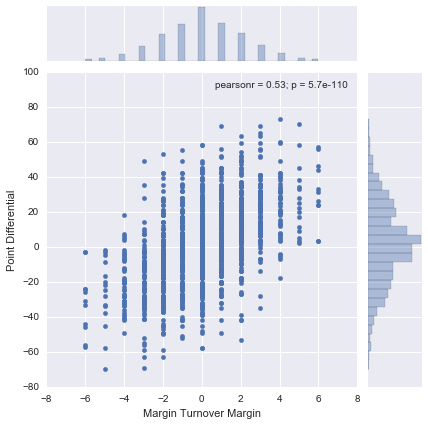

In [22]:
sns.jointplot(x='Margin Turnover Margin',y='Point Differential', data = cfb)